# Iris Dataset Analysis

## Prepare the dataset

Use `numpy` or to load `data/iris.data`. Remember to look at the file contents to understand the data format.

In [2]:
import numpy as np

In [12]:
attrs= np.loadtxt("data/iris.attributes", delimiter = ",")
classes = np.loadtxt("data/iris.classes", delimiter=",", dtype=str)
print(attrs)
print(classes)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

/tmp/ipykernel_1435668/1979954297.py:2: UserWarning: Input line 151 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  classes = np.loadtxt("data/iris.classes", delimiter=",", dtype=str)


Create a map that returns the attribute name given the attribute index.

- 0 -> sepal length
- 1 -> sepal width
- 2 -> petal length
- 3 -> petal width

In [9]:
attr_map = {
    0: "sepal length",
    1: "sepal width",
    2: "petal length",
    3: "petal width",
}
print(np.unique(classes))

for i in range(4):
    print(i, "→", attr_map[i])

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
0 → sepal length
1 → sepal width
2 → petal length
3 → petal width


## Data analysis

Write a function that prints the mean and another that prints the standard deviation of each attribute.

In [10]:
def print_means(arr):
    for idx in range(arr.shape[1]):
        name = attr_map[idx]
        m    = np.mean(arr[:, idx])
        print(f"{name:15s}: mean = {m:.3f}")

def print_stds(arr):
    for idx in range(arr.shape[1]):
        name = attr_map[idx]
        s    = np.std(arr[:, idx], ddof=1)   # sample std-dev
        print(f"{name:15s}: std  = {s:.3f}")


Use the functions you defined above to print the mean of the attributes for each class.

In [14]:
print_means(attrs)
print_stds(attrs)

sepal length   : mean = 5.843
sepal width    : mean = 3.054
petal length   : mean = 3.759
petal width    : mean = 1.199
sepal length   : std  = 0.828
sepal width    : std  = 0.434
petal length   : std  = 1.764
petal width    : std  = 0.763


Now, let's plot this data. Use `matplotlib` to create scatter plots for petal and sepal. Use different colors for each class.

In [15]:
import matplotlib.pyplot as plt

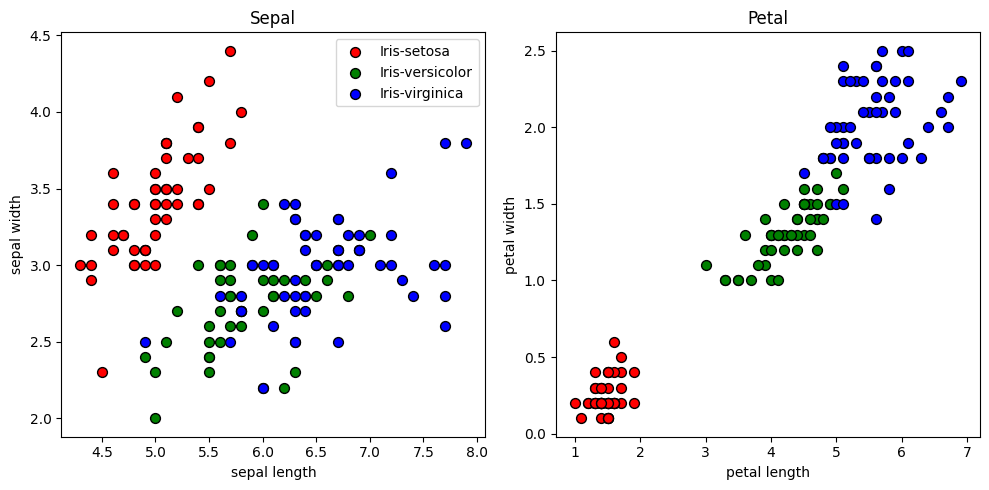

In [19]:
colors = {"Iris-setosa": "r",
          "Iris-versicolor": "g",
          "Iris-virginica": "b"}
fig, axes = plt.subplots(1,2, figsize=(10,5))

# Sepal: col 0 vs 1
ax = axes[0]
for cls in colors:
    m = classes == cls
    ax.scatter(attrs[m,0],
               attrs[m,1],
               label=cls,
               c=colors[cls],
               edgecolor="k",
               s=50)
ax.set_xlabel(attr_map[0])
ax.set_ylabel(attr_map[1])
ax.set_title("Sepal")
ax.legend()

# Petal: col 2 vs 3
ax = axes[1]
for cls in colors:
    m = classes == cls
    ax.scatter(attrs[m,2],
               attrs[m,3],
               label=cls,
               c=colors[cls],
               edgecolor="k",
               s=50)
ax.set_xlabel(attr_map[2])
ax.set_ylabel(attr_map[3])
ax.set_title("Petal")

plt.tight_layout()
plt.show()